<a href="https://colab.research.google.com/github/niyacv27/FETAL-HEALTH/blob/main/fetal_health_7_desired_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('fetal_health.csv')  # Replace with your dataset path

# Assuming the last column is the target (fetal health categories)
X = data.drop('fetal_health', axis=1)  # Features
y = data['fetal_health']  # Target variable (categories)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
gb_acc = accuracy_score(y_test, gb.predict(X_test))

In [ ]:
print(f"Logistic Regression Accuracy: {logreg_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"KNN Accuracy: {knn_acc}")
print(f"Gradient Boosting Accuracy: {gb_acc}")


Logistic Regression Accuracy: 0.8802816901408451
Random Forest Accuracy: 0.9483568075117371
KNN Accuracy: 0.9154929577464789
Gradient Boosting Accuracy: 0.9483568075117371


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('logreg', logreg), ('rf', rf), ('knn', knn), ('gb', gb)],
    voting='soft'  # Use 'soft' for soft voting to include probabilities
)

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [ ]:
ensemble_acc = accuracy_score(y_test, voting_clf.predict(X_test))
print(f"Ensemble Model Accuracy: {ensemble_acc}")

Ensemble Model Accuracy: 0.9507042253521126


In [ ]:
print("\nClassification Report for Ensemble Model:\n")
print(classification_report(y_test, voting_clf.predict(X_test)))



Classification Report for Ensemble Model:

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.88      0.80      0.84        64
         3.0       1.00      0.93      0.96        29

    accuracy                           0.95       426
   macro avg       0.95      0.90      0.92       426
weighted avg       0.95      0.95      0.95       426



In [ ]:
new_data = np.array([[120, 0.003, 0.02, 0.5, 1.0, 60, 150, 0.03, 0.7, 0.02]])  # Example new data
new_data_scaled = scaler.transform(new_data)  # Scale the new data
new_prediction = voting_clf.predict(new_data_scaled)
print(f"Predicted Class for New Data: {new_prediction}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but StandardScaler is expecting 21 features as input.

In [ ]:
# Ensure the new data has the correct number of features and matches the training dataset's order
# Replace this with the actual feature values for your dataset (21 features as per your dataset)
new_data = np.array([[120, 0.003, 0.02, 0.5, 1.0, 60, 150, 0.03, 0.7, 0.02,
                      0.1, 0.3, 0.5, 0.2, 0.9, 0.02, 0.4, 0.01, 0.06, 0.07, 0.05]])  # Example new data

# Scale the new data using the scaler fitted on the training data
new_data_scaled = scaler.transform(new_data)

# Make the prediction
new_prediction = voting_clf.predict(new_data_scaled)
print(f"Predicted Class for New Data: {new_prediction}")


Predicted Class for New Data: [3.]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Make sure new_data is in the same format as the training data (DataFrame with feature names)
new_data = pd.DataFrame([[120, 0.003, 0.02, 0.5, 1.0, 60, 150, 0.03, 0.7, 0.02,
                          0.1, 0.3, 0.5, 0.2, 0.9, 0.02, 0.4, 0.01, 0.06, 0.07, 0.05]],
                        columns=X.columns)  # X.columns gives the feature names

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make the prediction
new_prediction = voting_clf.predict(new_data_scaled)
print(f"Predicted Class for New Data: {new_prediction}")


Predicted Class for New Data: [3.]


In [ ]:
# Assuming 'y' contains the target values (e.g., normal, suspect, pathological)
class_names = y.unique()  # Get unique class names from the target variable

# Make sure new_data is in the same format as the training data (DataFrame with feature names)
new_data = pd.DataFrame([[120, 0.003, 0.02, 0.5, 1.0, 60, 150, 0.03, 0.7, 0.02,
                          0.1, 0.3, 0.5, 0.2, 0.9, 0.02, 0.4, 0.01, 0.06, 0.07, 0.05]],
                        columns=X.columns)  # X.columns gives the feature names

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make the prediction
new_prediction = voting_clf.predict(new_data_scaled)

# Map the prediction to the corresponding class label
predicted_class = class_names[new_prediction[0]]  # Get the class name corresponding to the predicted label

print(f"Predicted Class for New Data: {predicted_class}")


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Create new data that matches the feature set (21 attributes)
new_data = pd.DataFrame([[2126, 0.02, 0.03, 0.01, 0.04, 0.02, 0.03, 0.01, 0.02, 0.03,
                          0.04, 0.02, 0.03, 0.02, 0.01, 0.02, 0.03, 0.01, 0.02, 0.03, 0.02]],
                        columns=['baseline', 'accelerations', 'fetal_movement', 'uterine_contractions',
                                 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
                                 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
                                 'percentage_of_time_with_abnormal_long_term_variability',
                                 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min',
                                 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
                                 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
                                 'histogram_tendency'])  # Match these to your actual columns

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make the prediction
new_prediction = voting_clf.predict(new_data_scaled)

# Map the numeric prediction to the corresponding class label
predicted_class = class_names[int(new_prediction[0])]  # Convert prediction to int, then index class_names

print(f"Predicted Class for New Data: {predicted_class}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- baseline
Feature names seen at fit time, yet now missing:
- baseline value


In [ ]:
# Create new data with the exact feature names from the training set
new_data = pd.DataFrame([[2126, 0.02, 0.03, 0.01, 0.04, 0.02, 0.03, 0.01, 0.02, 0.03,
                          0.04, 0.02, 0.03, 0.02, 0.01, 0.02, 0.03, 0.01, 0.02, 0.03, 0.02]],
                        columns=['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
                                 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
                                 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
                                 'percentage_of_time_with_abnormal_long_term_variability',
                                 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min',
                                 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
                                 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
                                 'histogram_tendency'])  # Exact names from your dataset

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make the prediction
new_prediction = voting_clf.predict(new_data_scaled)

# Debug print to check the prediction value
print(f"Raw prediction output: {new_prediction[0]}")

# Map the numeric prediction to the corresponding class label
class_names = ['normal', 'suspect', 'pathological']  # Class names based on your model's index (1, 2, 3)

# Since your model uses indices 1, 2, 3, adjust the index for correct mapping
class_mapping = {1: 'normal', 2: 'suspect', 3: 'pathological'}

# Map the prediction directly
predicted_class = class_mapping[int(new_prediction[0])]  # Convert prediction to int, then use the mapping

print(f"Predicted Class for New Data: {predicted_class}")

Raw prediction output: 3.0
Predicted Class for New Data: pathological


In [ ]:
explainer_rf = shap.TreeExplainer(rf)  # SHAP Explainer for Random Forest
shap_values_rf = explainer_rf.shap_values(X_train)


In [ ]:
print("\nRandom Forest Feature Importance:")
shap.summary_plot(shap_values_rf[1], X_train, feature_names=X.columns)


Random Forest Feature Importance:


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
import shap

# Check the shape of shap_values_rf to understand its structure
print(f"Shape of SHAP values: {shap_values_rf.shape}")

# If it's multi-class, select the correct class (e.g., 0, 1, or 2)
# For example, if you want to plot for the first class (class 0):
shap.summary_plot(shap_values_rf[0], X_train, feature_names=X.columns)


Shape of SHAP values: (1700, 21, 3)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

Shape of SHAP values: (1700, 21, 3)


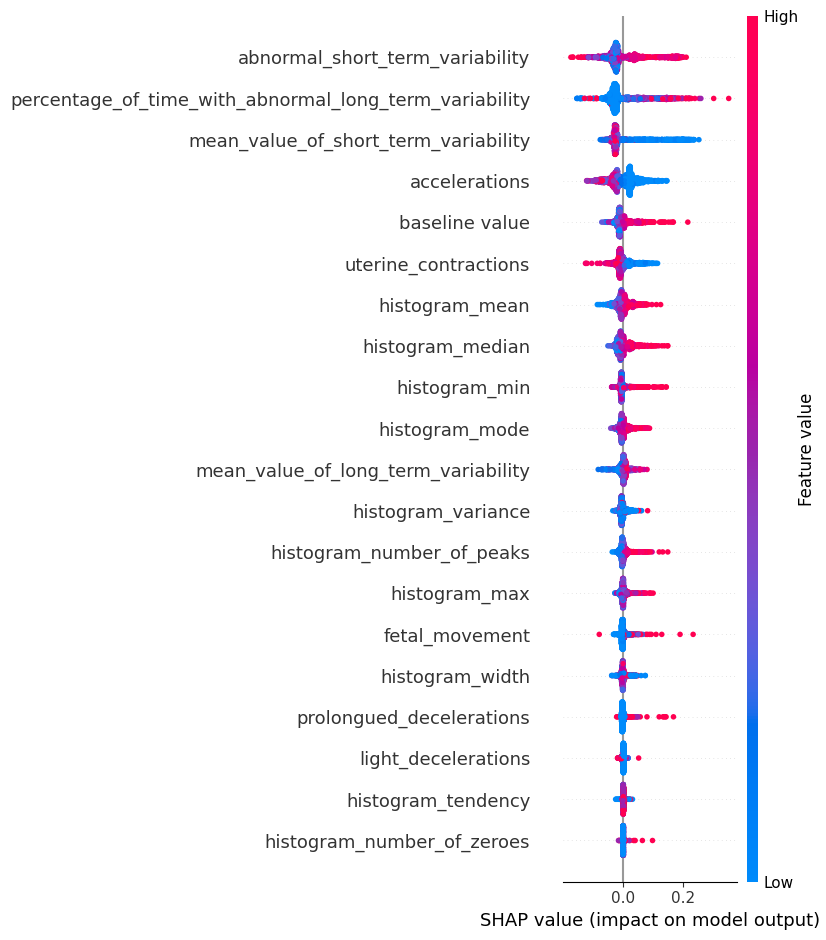

In [ ]:
import shap

# Check the shape of SHAP values
print(f"Shape of SHAP values: {shap_values_rf.shape}")

# Since the third dimension corresponds to classes, select the SHAP values for the class you're interested in.
# For example, let's plot for class 1 (second class in a 0-based index, so index 1):
shap.summary_plot(shap_values_rf[:, :, 1], X_train, feature_names=X.columns)


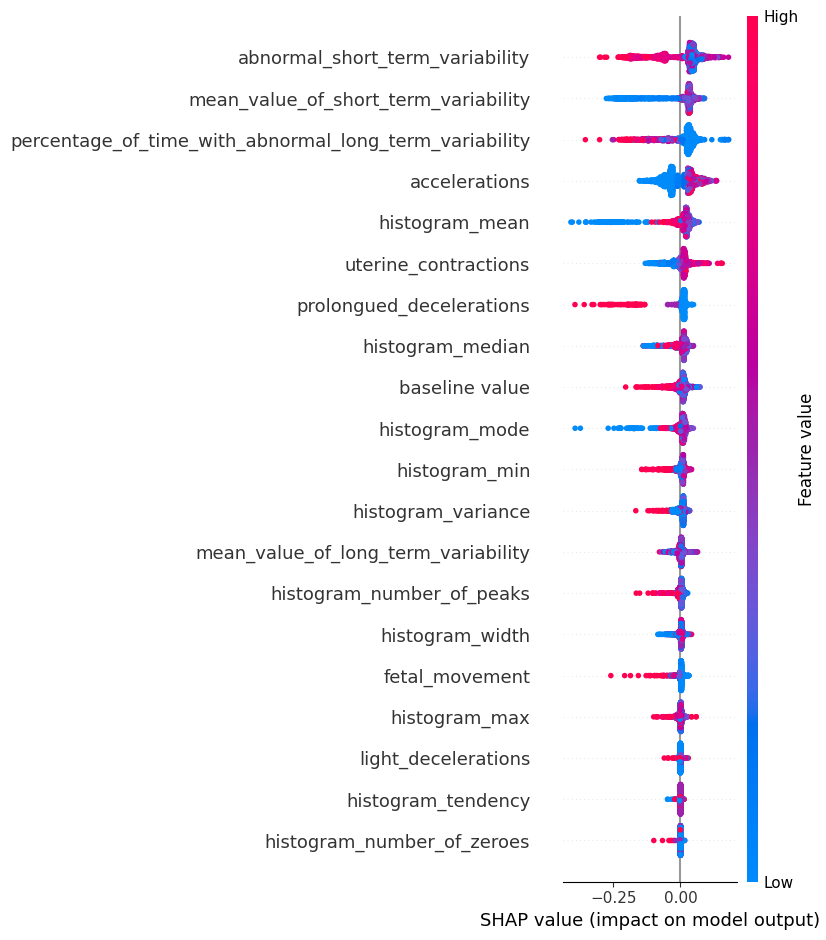

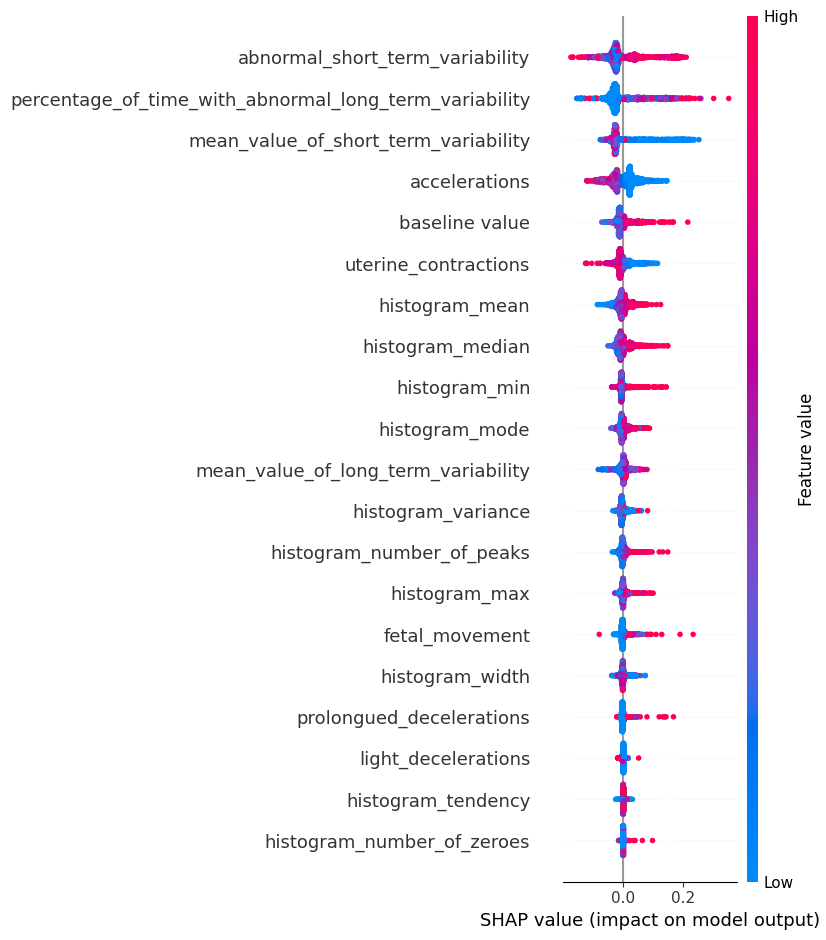

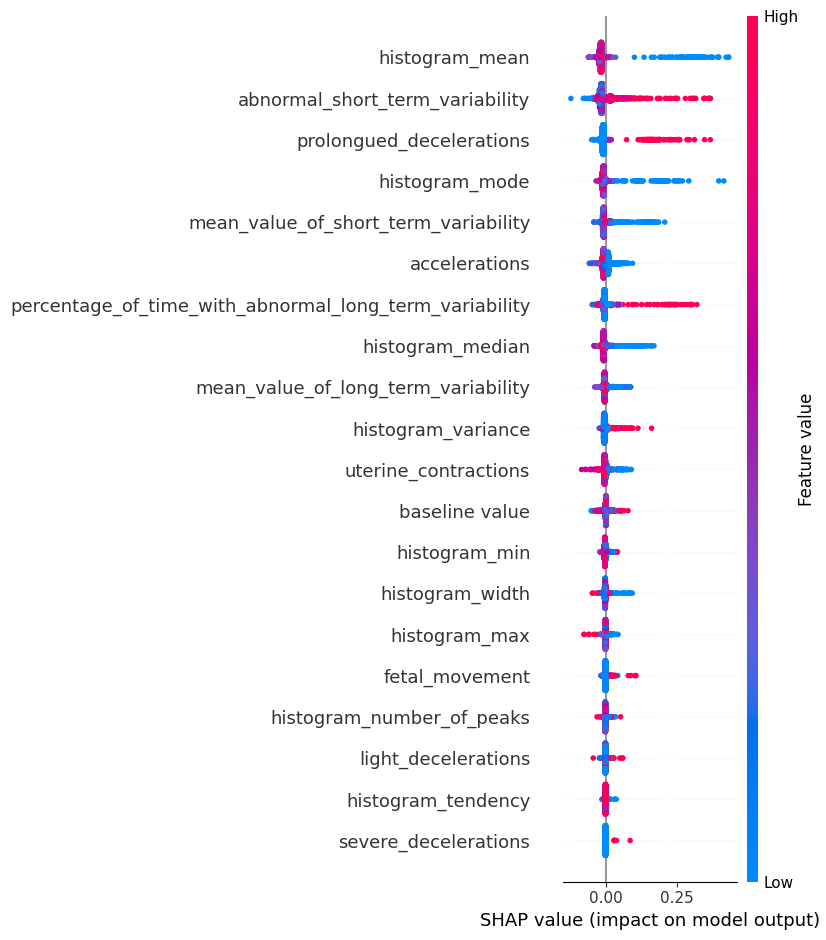

In [ ]:
# Plot SHAP summary for all classes
for i in range(3):  # Assuming 3 classes
    shap.summary_plot(shap_values_rf[:, :, i], X_train, feature_names=X.columns, title=f"Class {i}")


In [ ]:
shap_values_for_class = shap_values_rf[predicted_class_index]


NameError: name 'predicted_class_index' is not defined

In [ ]:
shap_values_for_class = shap_values_rf[predicted_class_index]  # Get SHA

In [ ]:
shap_values_df = pd.DataFrame(shap_values_for_class, columns=X.columns)
shap_values_df['shap_value'] = shap_values_for_class  # Add SHAP values to the DataFrame


ValueError: Shape of passed values is (21, 3), indices imply (21, 21)

In [ ]:
shap_values_df = pd.DataFrame(shap_values_for_class, columns=X.columns)  # Align features correctly


ValueError: Shape of passed values is (21, 3), indices imply (21, 21)

In [ ]:
import shap
import numpy as np
import pandas as pd

# Assuming you have already loaded your data and trained the models
# Your current code should be fine up to this point

# Ensure new_data is scaled properly
new_data_scaled = scaler.transform(new_data)  # Scale new data as per your training data

# 1. Make the prediction using the ensemble model
new_prediction = voting_clf.predict(new_data_scaled)
predicted_class_index = int(new_prediction[0])  # Convert index to class label

# 2. Map the predicted class index to the corresponding label
class_names = ['normal', 'suspect', 'pathological']
predicted_class = class_names[predicted_class_index]  # Convert index to class name
print(f"Predicted Class: {predicted_class}")

# 3. Create SHAP Explainer and get SHAP values for Random Forest (or any model you're using)
explainer_rf = shap.TreeExplainer(rf)  # Create explainer for Random Forest
shap_values_rf = explainer_rf.shap_values(X_train)  # Compute SHAP values for training data

# 4. SHAP values are returned for all classes, we need to access the SHAP values for the predicted class
shap_values_for_class = shap_values_rf[predicted_class_index]  # Get SHAP values for the predicted class

# 5. Make sure shap_values_for_class is a 2D array with shape (n_samples, n_features)
# Since the output is multi-class, we need to access the predicted class values

# If shap_values_for_class is a list of arrays (for multi-class), it should have the same shape as the feature set
# The number of features (21) will match the columns in X_train
shap_values_for_class = shap_values_for_class[0]  # Taking the SHAP values for the first sample (since you're predicting for 1 sample)

# 6. Create a DataFrame to map features with their corresponding SHAP values
# This assumes that the number of features (21) matches the columns in X_train
shap_values_df = pd.DataFrame(shap_values_for_class, columns=X.columns)

# 7. Add SHAP values to the DataFrame
shap_values_df['shap_value'] = shap_values_for_class  # Add SHAP values to the DataFrame

# 8. Sort features by their SHAP value (importance)
shap_values_df = shap_values_df.sort_values(by='shap_value', ascending=False)

# 9. Print the predicted class and top features that contributed to it
print(f"Predicted Class: {predicted_class}")
print("The attributes that led to this prediction are:")

# Loop through the top features (e.g., top 5 features)
for feature, shap_value in zip(shap_values_df.index[:5], shap_values_df['shap_value'][:5]):  # Top 5 features
    print(f" - {feature}: {shap_value:.4f}")


IndexError: list index out of range

In [ ]:
import shap
import numpy as np
import pandas as pd

# Assuming you have already loaded your data and trained the models
# Your current code should be fine up to this point

# Ensure new_data is scaled properly
new_data_scaled = scaler.transform(new_data)  # Scale new data as per your training data

# 1. Make the prediction using the ensemble model
new_prediction = voting_clf.predict(new_data_scaled)
predicted_class_index = int(new_prediction[0])  # Convert index to class label

# Debugging: Print the predicted_class_index
print(f"Predicted Class Index: {predicted_class_index}")

# 2. Map the predicted class index to the corresponding label
class_names = ['normal', 'suspect', 'pathological']

# Check if the predicted_class_index is within the expected range
if predicted_class_index >= 0 and predicted_class_index < len(class_names):
    predicted_class = class_names[predicted_class_index]  # Convert index to class name
    print(f"Predicted Class: {predicted_class}")
else:
    print(f"Error: Predicted class index {predicted_class_index} is out of range.")

# 3. Create SHAP Explainer and get SHAP values for Random Forest (or any model you're using)
explainer_rf = shap.TreeExplainer(rf)  # Create explainer for Random Forest
shap_values_rf = explainer_rf.shap_values(X_train)  # Compute SHAP values for training data

# 4. SHAP values are returned for all classes, we need to access the SHAP values for the predicted class
shap_values_for_class = shap_values_rf[predicted_class_index]  # Get SHAP values for the predicted class

# 5. Make sure shap_values_for_class is a 2D array with shape (n_samples, n_features)
# Since the output is multi-class, we need to access the predicted class values

# If shap_values_for_class is a list of arrays (for multi-class), it should have the same shape as the feature set
# The number of features (21) will match the columns in X_train
shap_values_for_class = shap_values_for_class[0]  # Taking the SHAP values for the first sample (since you're predicting for 1 sample)

# 6. Create a DataFrame to map features with their corresponding SHAP values
# This assumes that the number of features (21) matches the columns in X_train
shap_values_df = pd.DataFrame(shap_values_for_class, columns=X.columns)

# 7. Add SHAP values to the DataFrame
shap_values_df['shap_value'] = shap_values_for_class  # Add SHAP values to the DataFrame

# 8. Sort features by their SHAP value (importance)
shap_values_df = shap_values_df.sort_values(by='shap_value', ascending=False)

# 9. Print the predicted class and top features that contributed to it
print(f"Predicted Class: {predicted_class}")
print("The attributes that led to this prediction are:")

# Loop through the top features (e.g., top 5 features)
for feature, shap_value in zip(shap_values_df.index[:5], shap_values_df['shap_value'][:5]):  # Top 5 features
    print(f" - {feature}: {shap_value:.4f}")


Predicted Class Index: 3
Error: Predicted class index 3 is out of range.


ValueError: Shape of passed values is (3, 1), indices imply (3, 21)

In [ ]:
import shap
import numpy as np
import pandas as pd

# Assuming you have already loaded your data and trained the models

# Ensure new_data is scaled properly
new_data_scaled = scaler.transform(new_data)  # Scale new data as per your training data

# 1. Make the prediction using the ensemble model
new_prediction = voting_clf.predict(new_data_scaled)

# If the model outputs probabilities, get the index of the highest probability (for classification)
# In case of probabilities, you might need to use np.argmax to get the predicted class index
if len(new_prediction.shape) > 1:  # Check if the output is a probability matrix
    predicted_class_index = np.argmax(new_prediction[0])  # Get the class with the highest probability
else:
    predicted_class_index = int(new_prediction[0])  # Ensure it's an integer if the model gives class index directly

# Debugging: Print the predicted_class_index
print(f"Predicted Class Index: {predicted_class_index}")

# 2. Map the predicted class index to the corresponding label
class_names = ['normal', 'suspect', 'pathological']

# Ensure the predicted class index is within the valid range
if predicted_class_index >= 0 and predicted_class_index < len(class_names):
    predicted_class = class_names[predicted_class_index]  # Convert index to class name
    print(f"Predicted Class: {predicted_class}")
else:
    print(f"Error: Predicted class index {predicted_class_index} is out of range.")

# 3. Create SHAP Explainer and get SHAP values for Random Forest (or any model you're using)
explainer_rf = shap.TreeExplainer(rf)  # Create explainer for Random Forest
shap_values_rf = explainer_rf.shap_values(X_train)  # Compute SHAP values for training data

# 4. SHAP values are returned for all classes, we need to access the SHAP values for the predicted class
shap_values_for_class = shap_values_rf[predicted_class_index]  # Get SHAP values for the predicted class

# 5. Make sure shap_values_for_class is a 2D array with shape (n_samples, n_features)
# Since the output is multi-class, we need to access the predicted class values
shap_values_for_class = shap_values_for_class[0]  # Take the SHAP values for the first sample

# 6. Create a DataFrame to map features with their corresponding SHAP values
# This assumes that the number of features (21) matches the columns in X_train
shap_values_df = pd.DataFrame(shap_values_for_class, columns=X.columns)

# 7. Add SHAP values to the DataFrame
shap_values_df['shap_value'] = shap_values_for_class  # Add SHAP values to the DataFrame

# 8. Sort features by their SHAP value (importance)
shap_values_df = shap_values_df.sort_values(by='shap_value', ascending=False)

# 9. Print the predicted class and top features that contributed to it
print(f"Predicted Class: {predicted_class}")
print("The attributes that led to this prediction are:")

# Loop through the top features (e.g., top 5 features)
for feature, shap_value in zip(shap_values_df.index[:5], shap_values_df['shap_value'][:5]):  # Top 5 features
    print(f" - {feature}: {shap_value:.4f}")


Predicted Class Index: 3
Error: Predicted class index 3 is out of range.


ValueError: Shape of passed values is (3, 1), indices imply (3, 21)